In [23]:
import pandas as pd

In [28]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [29]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [31]:
data.shape

(200, 4)

In [32]:
import seaborn as sns

%matplotlib inline

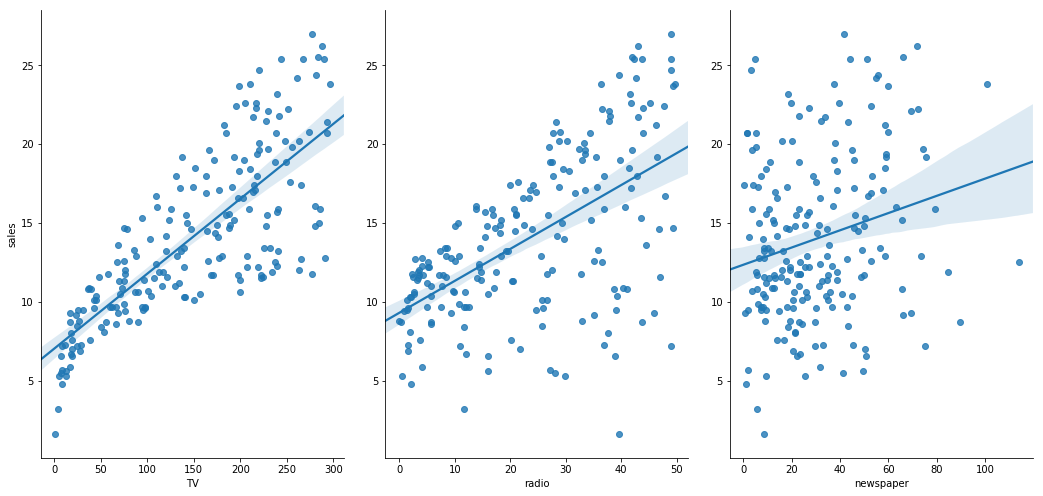

In [37]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

In [39]:
feature_cols = ['TV', 'radio', 'newspaper']

X = data[feature_cols]

# X = data[['TV', 'radio', 'newspaper']]

X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [41]:
print type(X)
print X.shape

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [48]:
y = data['sales']

y = data.sales

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [50]:
print type(y)
print y.shape

<class 'pandas.core.series.Series'>
(200,)


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=1)

In [58]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(150, 3)
(150,)
(50, 3)
(50,)


In [59]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

/Users/kong/.virtualenvs/ai2/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
print linreg.intercept_
print linreg.coef_

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [61]:
zip(feature_cols, linreg.coef_)

[('TV', 0.046564567874150267),
 ('radio', 0.17915812245088833),
 ('newspaper', 0.0034504647111804365)]

In [63]:
y_pred = linreg.predict(X_test)

In [64]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [65]:
print (10 + 0 + 20 + 10)/4

from sklearn import metrics
print metrics.mean_absolute_error(true,pred)

10
10.0


In [66]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [67]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.2474487139
12.2474487139
